# ___Time Series Analysis___

#### What do you mean by time series analysis ?
- __A time series is a collection of observations of well-defined data items obtained through repeated measurements over time these observations are dependent of time component__

#### What are the component of Time series analysis...?
- __Compenents are -__
    - Trend
    - Seasonality
    - Irregular component
    - Cyclic

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv('/content/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [58]:
#checking for the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [59]:
#don't need the column adj close
df.drop(['Adj Close'],axis=1, inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB


In [61]:
from datetime import datetime

In [62]:
df['Date']  =  pd.to_datetime(df['Date'])    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2416 non-null   datetime64[ns]
 1   Open    2416 non-null   float64       
 2   High    2416 non-null   float64       
 3   Low     2416 non-null   float64       
 4   Close   2416 non-null   float64       
 5   Volume  2416 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 113.4 KB


In [63]:
df = df.set_index('Date',drop=True)

In [64]:
df.shape

(2416, 5)

In [65]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [66]:
df_close = df['Close']['2010-06-29':'2020-02-03']
df_close.head()

Date
2010-06-29    23.889999
2010-06-30    23.830000
2010-07-01    21.959999
2010-07-02    19.200001
2010-07-06    16.110001
Name: Close, dtype: float64

In [67]:
df_close=df_close.reset_index()

In [68]:
df_clean  =  df_close.set_index(['Date'])
df_clean.head(5)

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


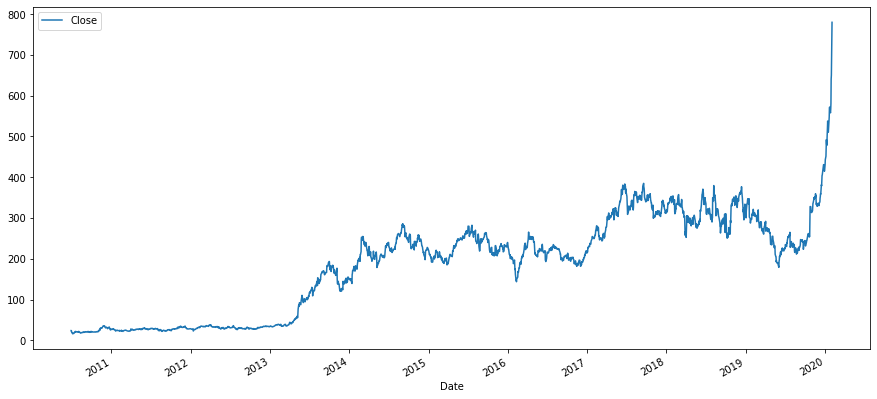

In [69]:
df_clean.plot(figsize=(15,7))

- we can see a trend component in the data
- lets analyze all the factor with the help of decomposition

#### What do you mean by decomposition?
- __Decomposition mean breaking data into Trend, Seasonality,Irregular component, Cyclic nature__

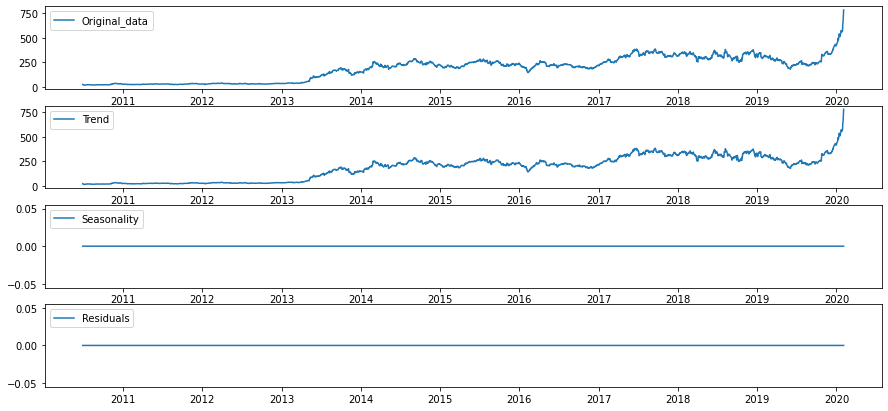

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(data):
    decomposition  =  seasonal_decompose(data,freq=1,model='additive')         

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(15,7))
    fig = plt.figure(1)

    plt.subplot(411)
    plt.plot(data,label='Original_data')
    plt.legend(loc=2)
    plt.subplot(412)
    plt.plot(trend,label='Trend')
    plt.legend(loc=2)
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc=2)
    plt.subplot(414)
    plt.plot(residual,label='Residuals')
    plt.legend(loc=2)



    plt.show()
decompose(df_clean)

- we can clearly see that there is a trend component is available in our data we have to remove that so that we can make our data Stationary

- For testing that the data is staionary or not we can perform ___Rolling Statistics___ and ___ADF testing___

### ___Rolling Statistics___

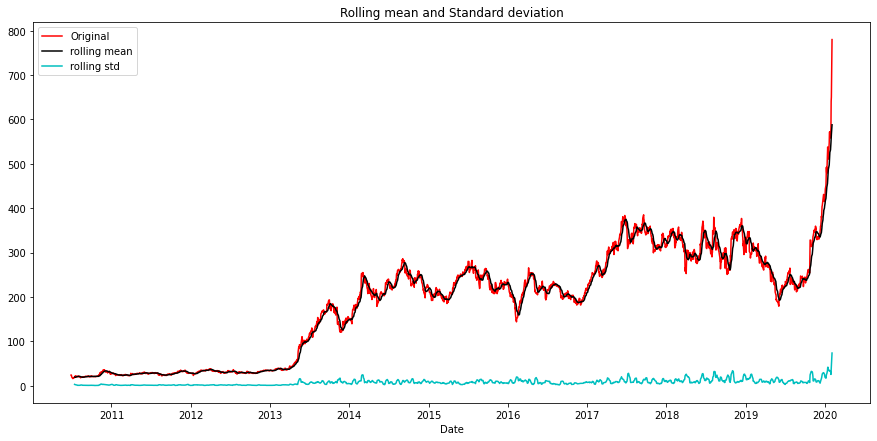

In [71]:
def roll_test(data):  
    rolling_mean = data.rolling(window=12).mean()
    rolling_standard_deviation = data.rolling(window=12).std()

    plt.figure(figsize=(15,7))

    original = plt.plot(data,label='Original',color='red')
    mean = plt.plot(rolling_mean,label='rolling mean',color='black')
    std = plt.plot(rolling_standard_deviation,label='rolling std',color='c')
    plt.legend(loc=2)
    plt.xlabel('Date')
    plt.title("Rolling mean and Standard deviation")
    plt.show()
roll_test(df_clean)

- rolling mean also have the trend component but lets try the ADF testing

### ___ADF Testing(Augmented Dickey Fuller Test)___

In [72]:
from statsmodels.tsa.stattools import adfuller

In [73]:
def testing(data):
    aft_test = adfuller(data['Close'],autolag='AIC')
    test_output = pd.Series(aft_test[0:4],index=['Test Statistics','Pvalue','Lags used','NUmber of observation used']) 
    for key,value in aft_test[4].items():
        test_output['critical value (%s)'%key] = value
    print(test_output)
testing(df_clean)

Test Statistics                  1.400069
Pvalue                           0.997114
Lags used                       18.000000
NUmber of observation used    2397.000000
critical value (1%)             -3.433081
critical value (5%)             -2.862747
critical value (10%)            -2.567412
dtype: float64


- now from the above observation we can able to understand that the data is non-stationary in nature.
- because ___P value > 0.05___ and ___test statistics >critical values___
-  now convert these data into stationary data

### ___Transforming the data into stationary data___

- we can remove the trend by using the differencing or the log transforming
1. __by using log transformation__

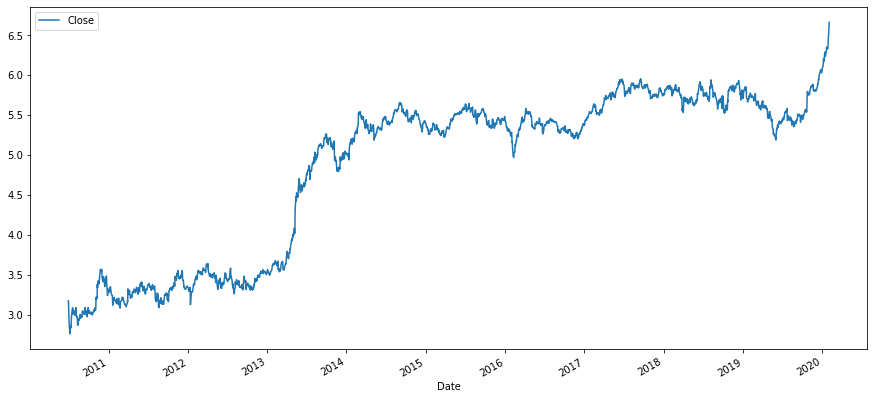

In [74]:
log_df = np.log(df_clean)
log_df.plot(figsize=(15,7))

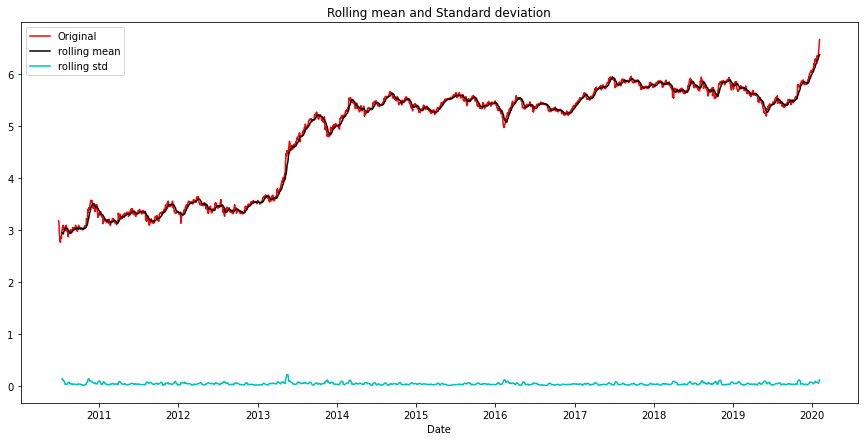

Test Statistics                 -0.657527
Pvalue                           0.857447
Lags used                        0.000000
NUmber of observation used    2415.000000
critical value (1%)             -3.433061
critical value (5%)             -2.862738
critical value (10%)            -2.567408
dtype: float64


In [75]:
roll_test(log_df)
testing(log_df)


- applying moving averrage Transformation

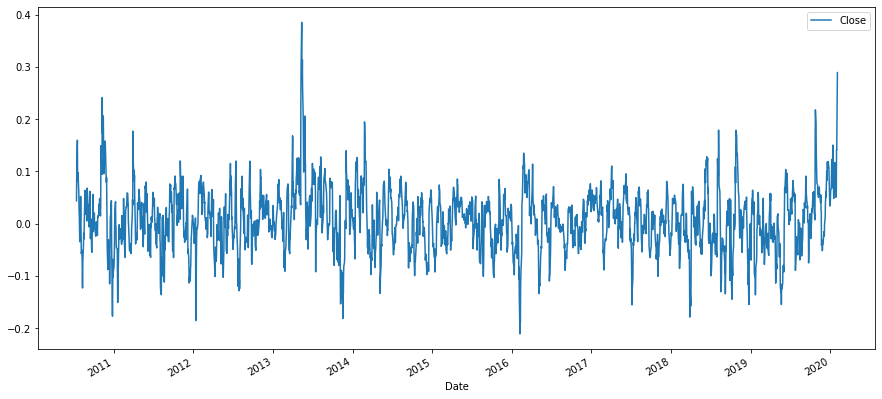

In [76]:
moving_average = log_df.rolling(window=12).mean()
log_moving_average = log_df- moving_average
log_moving_average.plot(figsize=(15,7))

In [77]:
#checking for the null values
log_moving_average.isnull().sum()

Close    11
dtype: int64

In [78]:
#removing these null values:
log_moving_average.dropna(inplace=True)
log_moving_average.isnull().sum()

Close    0
dtype: int64

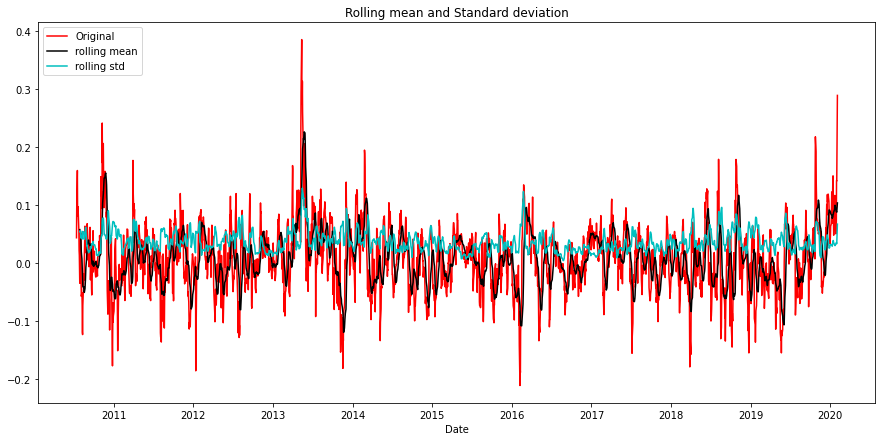

Test Statistics              -9.716740e+00
Pvalue                        9.784263e-17
Lags used                     1.100000e+01
NUmber of observation used    2.393000e+03
critical value (1%)          -3.433086e+00
critical value (5%)          -2.862749e+00
critical value (10%)         -2.567413e+00
dtype: float64


In [79]:
roll_test(log_moving_average)
testing(log_moving_average)

2. __Time shift__

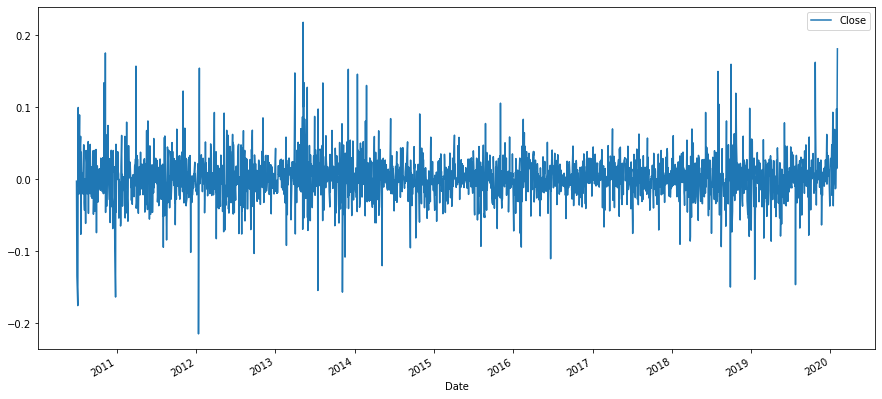

In [80]:
timeshift = log_df-log_df.shift()
timeshift.plot(figsize=(15,7))
plt.show()

In [81]:
timeshift.dropna(inplace=True)

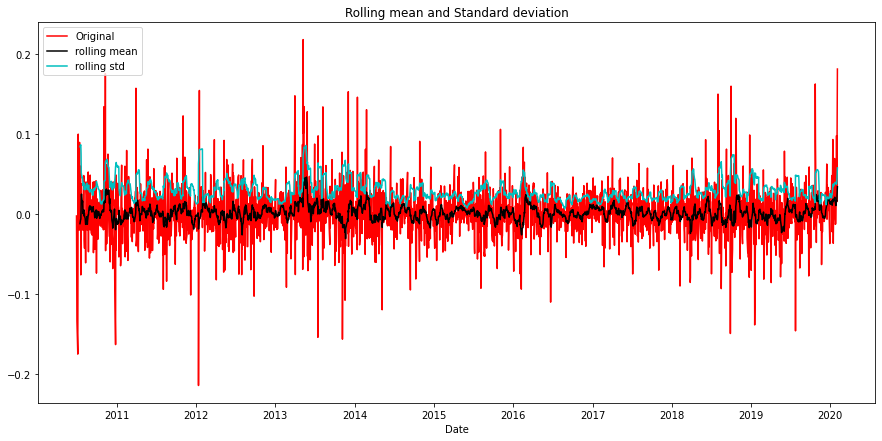

Test Statistics                -48.272207
Pvalue                           0.000000
Lags used                        0.000000
NUmber of observation used    2414.000000
critical value (1%)             -3.433062
critical value (5%)             -2.862738
critical value (10%)            -2.567408
dtype: float64


In [82]:
roll_test(timeshift)
testing(timeshift)

In [83]:
exponential = log_df.ewm(halflife=12,min_periods=0,adjust=True).mean()

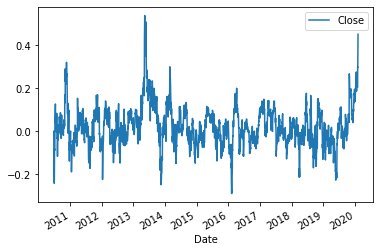

In [84]:
exponential_smooth = log_df - exponential
exponential_smooth.plot()

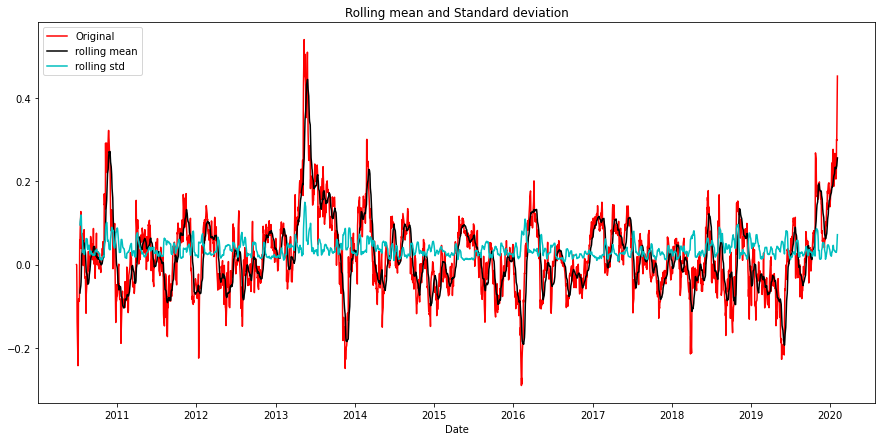

Test Statistics              -7.764595e+00
Pvalue                        9.260120e-12
Lags used                     0.000000e+00
NUmber of observation used    2.415000e+03
critical value (1%)          -3.433061e+00
critical value (5%)          -2.862738e+00
critical value (10%)         -2.567408e+00
dtype: float64


In [85]:
roll_test(exponential_smooth)
testing(exponential_smooth)

- We will mainly not use the time shift in time series analysis so we will go with the log transformation data 
- since the log transformation data has very low p value in after the smoothing 

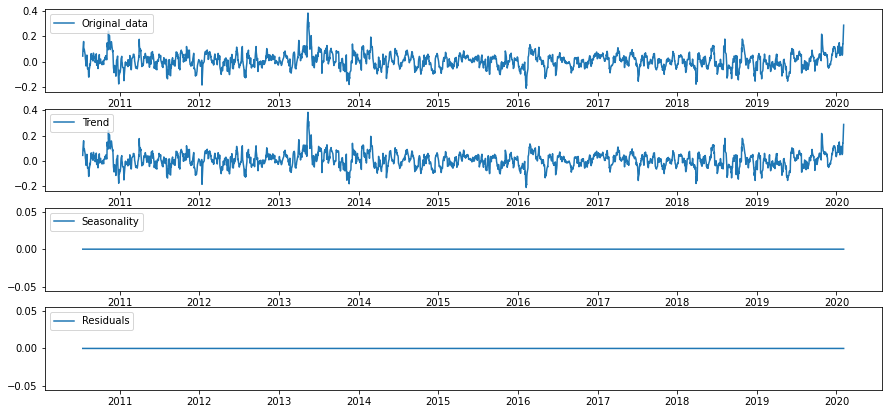

In [86]:
decompose(log_moving_average)

- now we can see that the datset is quit stationary and the trend part has been removed....

### Plotting ACF and PACF graphs

In [87]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

__ACF(Auto correlation function)__
- it measure direct and indirect effect of previous time lag on current value
- it uses to find the order of Moving average model (MA)

__PACF(Partial Auto-correlation function)__
- it measure direct effect of previous time lag on current value 
- it uses to find the order of auto regression model(AR)

- we just have to find the sudden __shuts off__ in pacf (___AR model___)

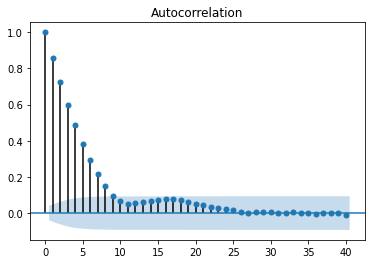

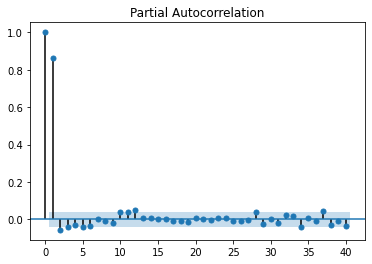

In [88]:
acf = plot_acf(log_moving_average,lags=40)
pacf = plot_pacf(log_moving_average,lags=40,method='ols')

- we can find the sudden shuts off value in pacf is __2__ (___AR MODEL___)
- we can find the value for the MA model as  __3__ (MA model)

### ___AR Model___

In [89]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error as mse

In [90]:
X = log_moving_average.values

In [91]:
train = X[1:len(X)-7] 
test = X[len(X)-7:]

In [92]:
model = AutoReg(train,lags=40)
model_fit = model.fit()
predict = model_fit.predict(start = len(train),end = len(train)+len(test)-1)
accuracy = mse(test,predict)
print('accuracy', accuracy)

accuracy 0.011955437498924557


- plotting the graph between the actual and the current values

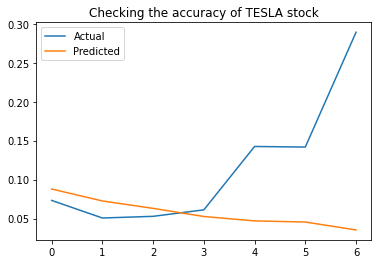

In [93]:
plt.plot(test,label ='Actual')
plt.plot(predict,label = 'Predicted')
plt.legend(loc=2)
plt.title('Checking the accuracy of TESLA stock')
plt.show()

### __MA Model__

In [94]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(train, order=(0,3))
model_fitting = model.fit()
predictionMA = model_fitting.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)
accuracy = mse(test,predictionMA)
print('accuracy',accuracy)

accuracy 0.017166949140036174


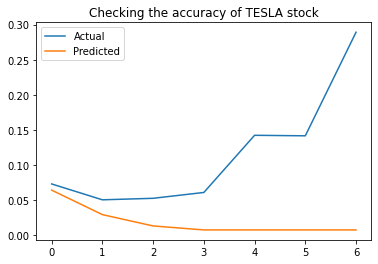

In [95]:
plt.plot(test,label ='Actual')
plt.plot(predictionMA,label = 'Predicted')
plt.legend(loc=2)
plt.title('Checking the accuracy of TESLA stock')
plt.show()

### ___ARMA model___

In [96]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(train, order=(2,3))
model_fitting = model.fit()
predictionARMA = model_fitting.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)
accuracy = mse(test,predictionARMA)
print('accuracy',accuracy)

accuracy 0.013336326768159637


### ___ARIMA model___

- we will directly use the AR model and MA model with the integrated part 
- here we will define three values p, d, q
- p (AR model) 2
- d (differencing) 2
- q (MA model) 3
- here we will use the differencing as 2 

In [99]:
from statsmodels.tsa.arima.model import ARIMA

In [121]:
model = ARIMA(train, order=(2,2,3))
fitting_ARIMA = model.fit()
ARIMA_pred = fitting_ARIMA.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)
accuracy = mse(test,ARIMA_pred)
print('accuracy',accuracy)

accuracy 0.0065478589003253995


## Conclusion
- we have the data of TSLA stock of last 10 years
- as we analye the dtaa and we get to knoe that the data is not stationary 
- so we convert the non- stationary data to stationary data by the log transformation with the moving average
- after that we had tested the pacf, acf testing to understand the values of the AR model and MA model
- after that apply the different models to understand that which model will gave us the best accuaracy
- so therefore 
    - AR model gave us the __mse__ as 0.0119
    - MA model gave us the __mse__ as 0.017
    - ARMA model gave us the __mse__ as 0.0133
    - ARIMA model gave us the __mse__ as 0.006
    
#### ARIMA model gave us the best result